<a href="https://colab.research.google.com/github/Mercy-Kamau/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np #for array definition 
import pandas as pd #for data analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #to visualize random distribution 
%matplotlib inline
from scipy import stats # for optimization purposes

In [ ]:
df = pd.read_csv('../content/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
df.shape


(920, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [ ]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [ ]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [ ]:
df['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [ ]:
df['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [ ]:
df['thal'].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [ ]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df.columns = ['id', 'age', 'sex', 'study_location', 'chest_pain_type', 'resting_bloodpressure', 'cholestrol', 'fasting_bloodsugar', 'resting_ecg', 'maximum_heartrate_achieved', 'exercise_induced angina', 'st_depression', 'slope', 'major_vessel_colored', 'thal','target']

In [ ]:
df.head()

,id,age,sex,study_location,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bloodsugar,resting_ecg,maximum_heartrate_achieved,exercise_induced angina,st_depression,slope,major_vessel_colored,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.describe() #calculating percentile of statistical data

,id,age,resting_bloodpressure,cholestrol,maximum_heartrate_achieved,st_depression,major_vessel_colored,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.describe(include=[np.object]) #includes only string columns in dataset

,sex,study_location,chest_pain_type,fasting_bloodsugar,resting_ecg,exercise_induced angina,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [ ]:
df.dropna(inplace=True) #drop missing values and keep dataframe with valid values 

In [ ]:
df.isnull().sum() #returns the number of missing values in the dataset

id                            0
age                           0
sex                           0
study_location                0
chest_pain_type               0
resting_bloodpressure         0
cholestrol                    0
fasting_bloodsugar            0
resting_ecg                   0
maximum_heartrate_achieved    0
exercise_induced angina       0
st_depression                 0
slope                         0
major_vessel_colored          0
thal                          0
target                        0
dtype: int64

In [ ]:
df.shape #shape after dropping some rows 

(299, 16)

In [ ]:
df['target'].value_counts()

0    160
1     56
2     35
3     35
4     13
Name: target, dtype: int64

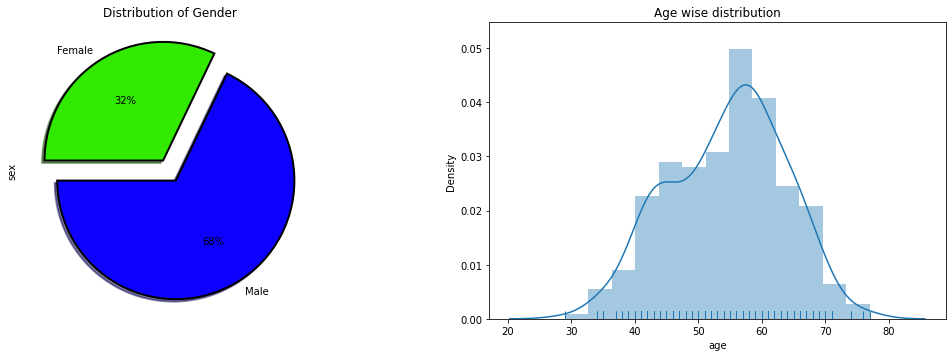

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('prism',5), startangle = 900, labels =['Male','Female'], wedgeprops = {'linewidth':2, 'edgecolor':'k'}, explode = [.1,.1], shadow = True)
plt.title('Distribution of Gender')
plt.subplot(222)
ax = sns.distplot(df['age'], rug = True)
plt.title('Age wise distribution')
plt.show()

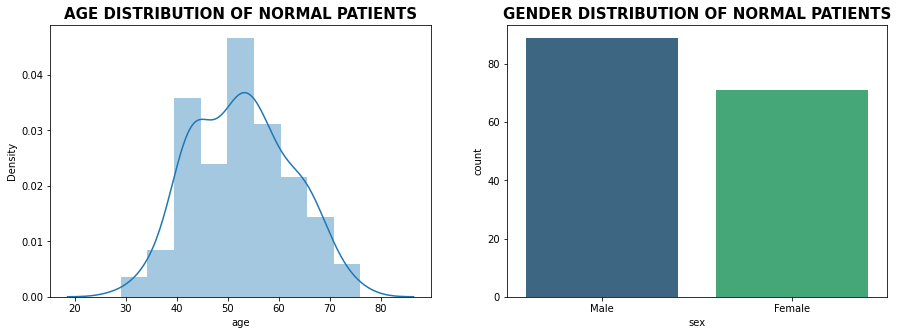

In [ ]:
attr_0  = df[df['target'] == 0]
attr_1  = df[df['target'] == 1]
attr_2  = df[df['target'] == 2]
attr_3  = df[df['target'] == 3]
attr_4  = df[df['target'] == 4]
#plotting normal patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

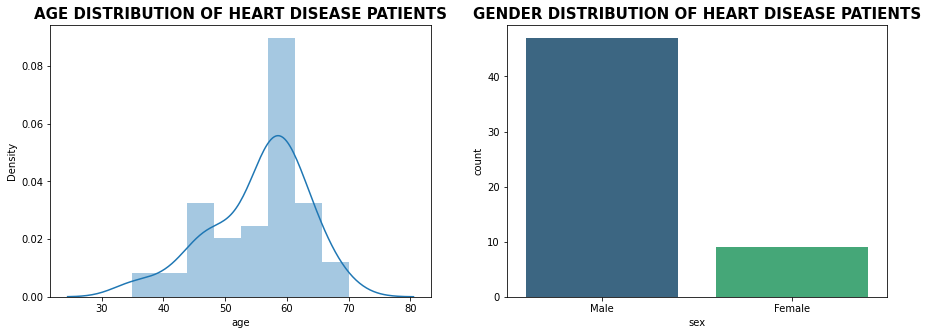

In [ ]:
#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()



Text(0.5, 1.0, 'CHEST PAIN OF NORMAL PATIENTS')

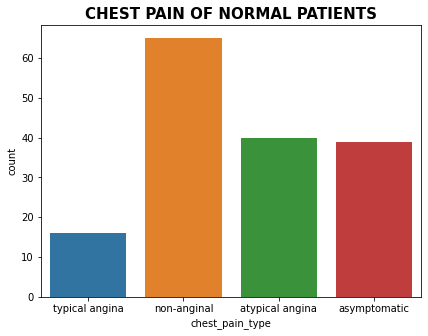

In [ ]:
#plotting for chest pains in normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')


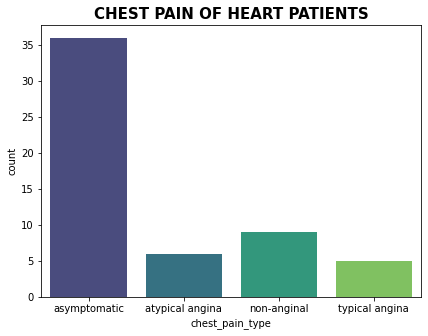

In [ ]:
#plotting heart patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1,2,3,4
chest_pain_type,,,,,
asymptomatic,24.380000,64.290000,82.860000,82.860000,84.620000
atypical angina,25.000000,10.710000,2.860000,5.710000,0.000000
non-anginal,40.620000,16.070000,11.430000,11.430000,7.690000
typical angina,10.000000,8.930000,2.860000,0.000000,7.690000


Text(0.5, 1.0, 'REST ECG OF NORMAL PATIENTS')

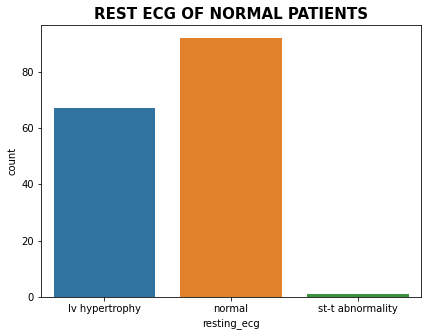

In [ ]:
#plotting ECG in normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['resting_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')



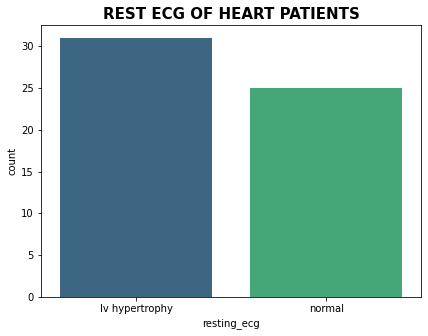

In [ ]:
#plotting of ECG of patients with heart disease
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['resting_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

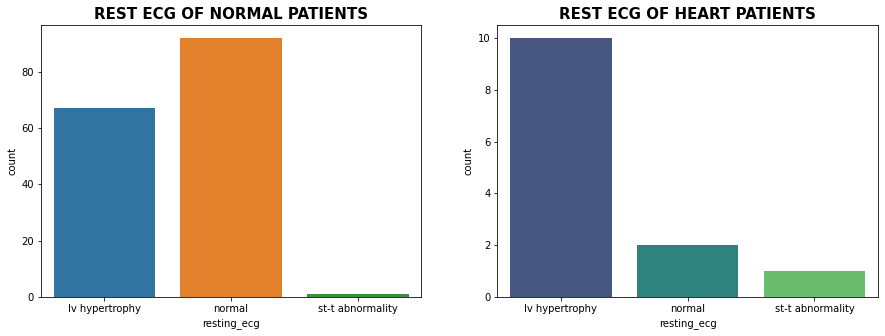

In [ ]:
#comparison of Rest ECG in normal patients and patients with heart disease
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['resting_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')


ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_4['resting_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
plot_criteria= ['resting_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1,2,3,4
resting_ecg,,,,,
lv hypertrophy,41.880000,55.360000,45.710000,62.860000,76.920000
normal,57.500000,44.640000,51.430000,34.290000,15.380000
st-t abnormality,0.620000,0.000000,2.860000,2.860000,7.690000


Text(0.5, 1.0, 'SLOPE OF NORMAL PATIENTS')

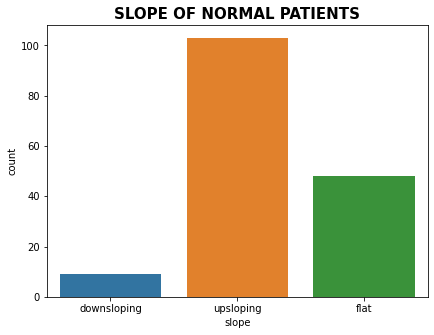

In [ ]:
#plotting of slope for normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['slope'])
plt.title('SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')



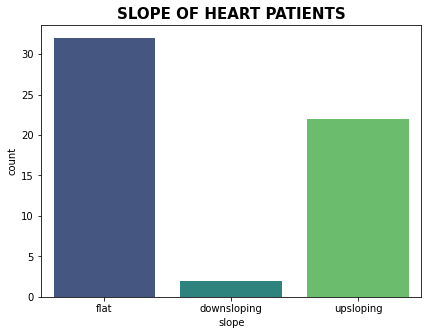

In [ ]:
#plot the slope of patients with heart disease 
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['slope'], palette='viridis')
plt.title('SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

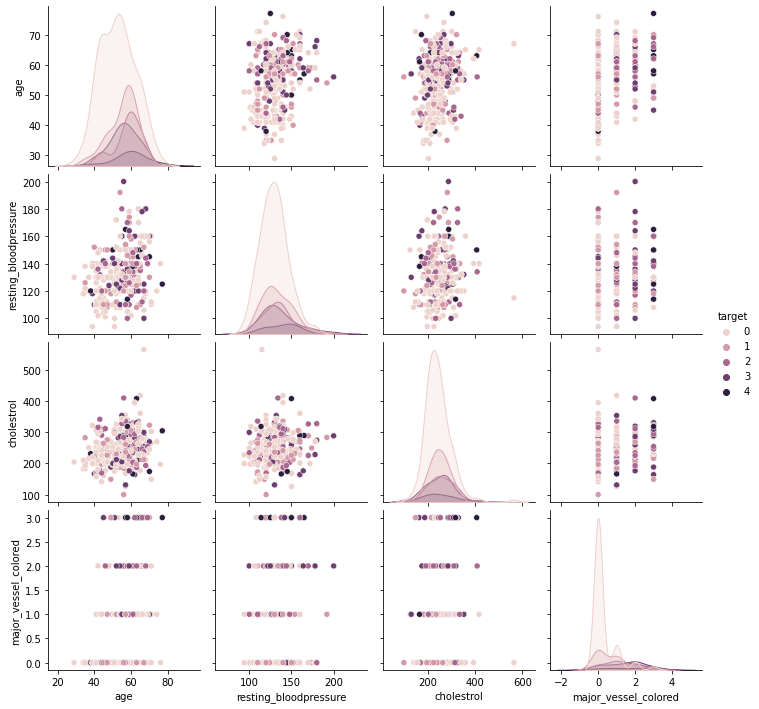

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_bloodpressure', 'cholestrol', 'major_vessel_colored'] )

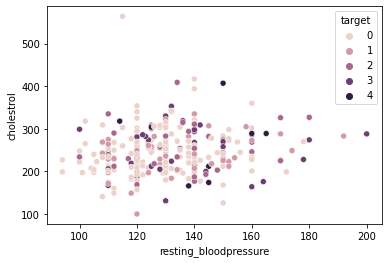

In [ ]:
sns.scatterplot(x = 'resting_bloodpressure', y = 'cholestrol', hue = 'target', data = df)

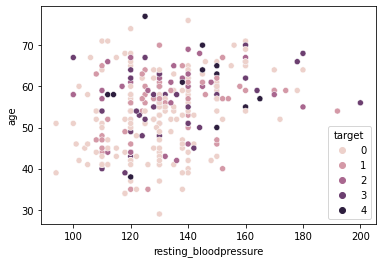

In [ ]:
sns.scatterplot(x = 'resting_bloodpressure', y = 'age', hue = 'target', data = df)

In [ ]:
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)

In [ ]:
df['chest_pain_type'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)

In [ ]:
df.head()

,id,age,sex,study_location,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bloodsugar,resting_ecg,maximum_heartrate_achieved,exercise_induced angina,st_depression,slope,major_vessel_colored,thal,target
0,1,63,Male,Cleveland,typical_angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed_defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable_defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical_angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df['target'] = ((df['target'] > 0)*1)
df['sex'] = (df['sex'] == 'Male')*1
df['fasting_bloodsugar'] = (df['fasting_bloodsugar'])*1
df['exercise_induced angina'] = (df['exercise_induced angina'])*1
df.drop(['study_location'],axis = 1, inplace = True)

In [ ]:
df.head()

,id,age,sex,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bloodsugar,resting_ecg,maximum_heartrate_achieved,exercise_induced angina,st_depression,slope,major_vessel_colored,thal,target
0,1,63,1,typical_angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
1,2,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,3,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
3,4,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,5,41,0,atypical_angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [ ]:
df = pd.get_dummies(df, drop_first=False)
df.columns

Index(['id', 'age', 'sex', 'resting_bloodpressure', 'cholestrol',
       'maximum_heartrate_achieved', 'st_depression', 'major_vessel_colored',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_bloodsugar_0',
       'fasting_bloodsugar_1', 'resting_ecg_lv hypertrophy',
       'resting_ecg_normal', 'resting_ecg_st-t abnormality',
       'exercise_induced angina_0', 'exercise_induced angina_1',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed_defect', 'thal_normal', 'thal_reversable_defect'],
      dtype='object')

In [ ]:
df.head()

,id,age,sex,resting_bloodpressure,cholestrol,maximum_heartrate_achieved,st_depression,major_vessel_colored,target,chest_pain_type_asymptomatic,...,resting_ecg_normal,resting_ecg_st-t abnormality,exercise_induced angina_0,exercise_induced angina_1,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
0,1,63,1,145.0,233.0,150.0,2.3,0.0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2,67,1,160.0,286.0,108.0,1.5,3.0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,3,67,1,120.0,229.0,129.0,2.6,2.0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,4,37,1,130.0,250.0,187.0,3.5,0.0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,5,41,0,130.0,204.0,172.0,1.4,0.0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
X = df.drop(['target'],axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
print('Distribution of target variable in training set')
print(y_train.value_counts())


Distribution of target variable in training set
0    128
1    111
Name: target, dtype: int64


In [ ]:
print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in test set
0    32
1    28
Name: target, dtype: int64


In [ ]:
print('Training Set')
print(X_train.shape)
print(y_train.shape)

Training Set
(239, 25)
(239,)


In [ ]:
print('Test Set')
print(X_test.shape)
print(y_test.shape)

Test Set
(60, 25)
(60,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_bloodpressure','cholestrol','maximum_heartrate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_bloodpressure','cholestrol','maximum_heartrate_achieved','st_depression']])
X_train.head()

,id,age,sex,resting_bloodpressure,cholestrol,maximum_heartrate_achieved,st_depression,major_vessel_colored,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,...,resting_ecg_normal,resting_ecg_st-t abnormality,exercise_induced angina_0,exercise_induced angina_1,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
172,173,0.638298,0,0.754717,0.321121,0.549618,0.000000,0.0,1,0,...,1,0,0,1,0,1,0,0,1,0
245,246,0.808511,1,0.245283,0.295259,0.000000,0.161290,0.0,1,0,...,1,0,1,0,0,1,0,0,1,0
234,235,0.531915,0,0.622642,0.217672,0.702290,0.000000,1.0,0,0,...,1,0,1,0,0,0,1,0,1,0
127,128,0.531915,1,0.150943,0.299569,0.419847,0.451613,1.0,1,0,...,1,0,0,1,0,1,0,0,0,1
80,81,0.340426,1,0.094340,0.232759,0.587786,0.483871,0.0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
X_test[['age','resting_bloodpressure','cholestrol','maximum_heartrate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_bloodpressure','cholestrol','maximum_heartrate_achieved','st_depression']])
X_test.head()

,id,age,sex,resting_bloodpressure,cholestrol,maximum_heartrate_achieved,st_depression,major_vessel_colored,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,...,resting_ecg_normal,resting_ecg_st-t abnormality,exercise_induced angina_0,exercise_induced angina_1,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
183,184,0.638298,1,0.792453,0.366379,0.564885,0.677419,0.0,0,0,...,0,0,1,0,1,0,0,0,0,1
46,47,0.468085,1,0.150943,0.161638,0.396947,0.096774,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0
290,291,0.808511,1,0.547170,0.241379,0.603053,0.129032,0.0,0,0,...,0,0,1,0,0,1,0,0,0,1
155,156,0.872340,1,0.339623,0.478448,0.290076,0.387097,3.0,1,0,...,0,0,1,0,0,1,0,0,1,0
68,69,0.638298,1,0.716981,0.487069,0.526718,0.548387,0.0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

In [ ]:
def BasedLine2(X_train, y_train,models):
    
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [ ]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
#CM=confusion_matrix(y_test,y_pred_rfe)
#sns.heatmap(CM, annot=True)

#TN = CM[0][0]
#FN = CM[1][0]
#TP = CM[1][1]
#FP = CM[0][1]
#specificity = TN/(TN+FP)
#loss_log = log_loss(y_test, y_pred_rfe)
#acc= accuracy_score(y_test, y_pred_rfe)
#roc=roc_auc_score(y_test, y_pred_rfe)
#prec = precision_score(y_test, y_pred_rfe)
#rec = recall_score(y_test, y_pred_rfe)
#f1 = f1_score(y_test, y_pred_rfe)
#mathew = matthews_corrcoef(y_test, y_pred_rfe)
#model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
 #              columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

#model_results


In [ ]:
data = {        'MLP': y_pred_mlp, 
                
                'EXtra tree classifier': y_pred_et_100,
                'CART': y_pred_decc, 
                'SVC': y_pred_svc, 
                
                 
                 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results
    

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.800000,0.807692,0.750000,0.84375,0.777778,0.796875,6.907822,0.597766
1,MLP,0.783333,0.800000,0.714286,0.84375,0.754717,0.779018,7.483468,0.564692
2,EXtra tree classifier,0.833333,0.875000,0.750000,0.90625,0.807692,0.828125,5.756503,0.668292
3,CART,0.716667,0.677419,0.750000,0.68750,0.711864,0.718750,9.786120,0.436769
4,SVC,0.833333,0.875000,0.750000,0.90625,0.807692,0.828125,5.756503,0.668292
5,GBM,0.833333,0.846154,0.785714,0.87500,0.814815,0.830357,5.756516,0.665184
